In [ ]:
"""
Introdução à User Story US09: Análise Estatística de Consumo de Água em Parques Verdes

A User Story US09, intitulada "Análise Estatística de Consumo de Água em Parques Verdes", visa fornecer aos Gerentes de Espaços Verdes (GSM) informações precisas sobre os custos referentes ao consumo de água em espaços verdes específicos. Essa análise permite uma gestão eficiente dos gastos relacionados à água, garantindo uma alocação adequada de recursos financeiros.

Para atender a essa demanda, a US09 propõe uma série de funcionalidades implementadas por meio de código Python, utilizando o conjunto de dados disponibilizado no arquivo "water_consumption.csv". Este arquivo registra o consumo diário de água (em metros cúbicos - m³) desde a abertura de cada parque verde. O custo da água é de 0,7 AC/m³, até um consumo de 1000m³/mês, sendo aplicada uma taxa adicional de 15% para níveis de consumo mais elevados.

As funcionalidades incluídas nesta US são as seguintes:

1. Barplot Representando o Consumo Mensal de Água: Um gráfico de barras é gerado para representar o consumo mensal de água em um determinado parque verde. O usuário especifica o ano, o período de tempo (mês inicial e final) e a identificação do parque.

2. Média dos Custos Mensais de Consumo de Água: Calcula a média dos custos mensais relacionados ao consumo de água para cada parque verde. O usuário define o número de parques a serem analisados e a identificação de cada parque.

3. Análise Estatística Comparativa: Realiza uma análise comparativa entre o parque com o maior e o menor consumo de água. As seguintes estatísticas são calculadas e comparadas para esses dois parques:
   - Média
   - Mediana
   - Desvio padrão
   - Coeficiente de assimetria

Além disso, a análise inclui a construção de tabelas de frequência relativa e absoluta para os dados classificados em 5 classes. Também são identificados outliers em cada conjunto de dados, considerando a definição de valores que se desviam da mediana em mais de 1,5 vezes o intervalo interquartil. Finalmente, os dados são representados graficamente através de histogramas com 10 e 100 classes para cada parque.

Essas funcionalidades fornecem uma compreensão abrangente do consumo de água nos parques verdes, permitindo uma gestão eficaz dos recursos financeiros e uma tomada de decisão informada pelos Gerentes de Espaços Verdes.
"""


Park with highest consumption:  Cidade
Park with lowest consumption:  ArcaAgua

Statistical Analysis for Park with highest consumption:
count    456.000000
mean     116.240589
std       71.724871
min        0.000000
25%       68.581976
50%       85.995000
75%      151.782967
max      922.654688
Name: Consumption, dtype: float64

Statistical Analysis for Park with lowest consumption:
count    456.000000
mean       8.995993
std        4.852369
min        0.000000
25%        5.381848
50%        6.771855
75%       11.705398
max       49.218750
Name: Consumption, dtype: float64


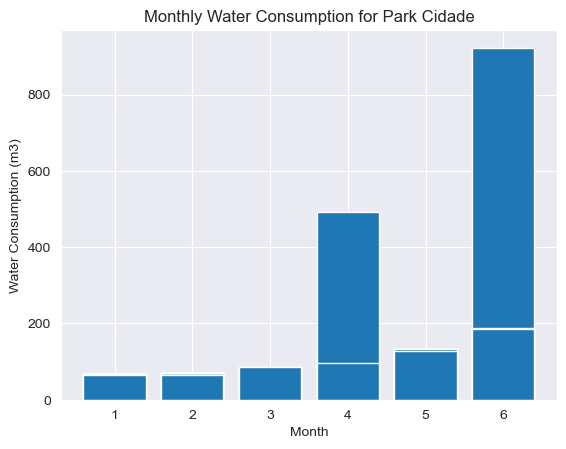

Average Monthly Costs for Park Oriental: 
Year
2023    813.68451
2024    469.60200
Name: Consumption, dtype: float64


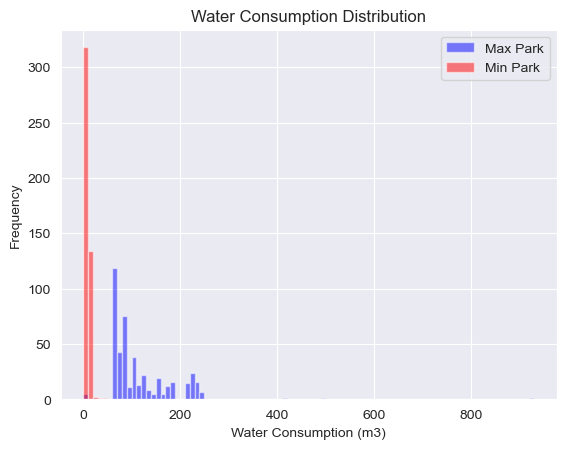

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Carregar os dados do arquivo CSV
data = pd.read_csv('../datasetsMATCP/water_consumption.csv', sep=';', decimal=',')

def calculate_statistics():
    # Cálculos estatísticos para os parques com maior e menor consumo de água
    grouped_data = data.groupby('Park')['Consumption'].describe()
    max_consumption_park = grouped_data[grouped_data['max'] == grouped_data['max'].max()].index[0]
    min_consumption_park = grouped_data[grouped_data['min'] == grouped_data['min'].min()].index[0]

    print("Park with highest consumption: ", max_consumption_park)
    print("Park with lowest consumption: ", min_consumption_park)

    max_park_data = data[data['Park'] == max_consumption_park]['Consumption']
    min_park_data = data[data['Park'] == min_consumption_park]['Consumption']

    # Remover valores NaN
    max_park_data = max_park_data.dropna()
    min_park_data = min_park_data.dropna()

    # Cálculos estatísticos
    max_park_stats = max_park_data.describe()
    min_park_stats = min_park_data.describe()

    return max_park_stats, min_park_stats

def display_statistics(max_park_stats, min_park_stats):
    print("\nStatistical Analysis for Park with highest consumption:")
    print(max_park_stats)
    print("\nStatistical Analysis for Park with lowest consumption:")
    print(min_park_stats)

def monthly_water_consumption(barplot_specs):
    # Filtro dos dados baseado nas especificações
    filtered_data = data[(data['Year'] == barplot_specs['year']) &
                         (data['Month'].between(barplot_specs['StartMonth'], barplot_specs['EndMonth'])) &
                         (data['Park'] == barplot_specs['park_id'])]

    # Criação do barplot
    plt.bar(filtered_data['Month'], filtered_data['Consumption'])
    plt.xlabel('Month')
    plt.ylabel('Water Consumption (m3)')
    plt.title('Monthly Water Consumption for Park {}'.format(barplot_specs['park_id']))
    plt.show()

def monthly_costs(num_parks, park_id):
    # Filtro dos dados para calcular os custos mensais de consumo de água
    filtered_data = data[data['Park'] == park_id].groupby(['Year', 'Month'])['Consumption'].sum()
    avg_costs = filtered_data * 0.7  # custo por m3
    avg_costs = avg_costs.apply(lambda x: x if x <= 1000 else x + (x - 1000) * 0.15)  # cálculo do custo com taxa adicional
    avg_costs = avg_costs.groupby('Year').mean()

    print("Average Monthly Costs for Park {}: \n{}".format(park_id, avg_costs.tail(num_parks)))

def statistical_analysis():
    # Cálculos estatísticos para os parques com maior e menor consumo de água
    grouped_data = data.groupby('Park')['Consumption'].describe()
    max_consumption_park = grouped_data[grouped_data['max'] == grouped_data['max'].max()].index[0]
    min_consumption_park = grouped_data[grouped_data['min'] == grouped_data['min'].min()].index[0]

    max_park_data = data[data['Park'] == max_consumption_park]['Consumption']
    min_park_data = data[data['Park'] == min_consumption_park]['Consumption']


    # Construção de histogramas
    plt.hist(max_park_data, bins=[x for x in range(0, int(max_park_data.max()) + 10, 10)], alpha=0.5, label='Max Park', color='blue')
    plt.hist(min_park_data, bins=[x for x in range(0, int(min_park_data.max()) + 10, 10)], alpha=0.5, label='Min Park', color='red')
    plt.xlabel('Water Consumption (m3)')
    plt.ylabel('Frequency')
    plt.title('Water Consumption Distribution')
    plt.legend(loc='upper right')
    plt.show()

# Especificações para o barplot mensal
barplot_specs = {
    'year': 2023,
    'StartMonth': 1,
    'EndMonth': 6,
    'park_id': 'Cidade'
}

def main():
    # Chamada das funções para calcular estatísticas
    max_park_stats, min_park_stats = calculate_statistics()

    # Exibição das estatísticas
    display_statistics(max_park_stats, min_park_stats)

    # Exibição dos histogramas
    max_park_data = data[data['Park'] == max_park_stats.index[0]]['Consumption']
    min_park_data = data[data['Park'] == min_park_stats.index[0]]['Consumption']
    
    # Chamada das funções
    monthly_water_consumption(barplot_specs)
    monthly_costs(2, 'Oriental')
    statistical_analysis()

if __name__ == "__main__":
    main()